In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
def make_widget(p):
  random_number = np.random.random()
  
  # If below p, widget is defective
  if random_number <= p:
    return 1
  else:
    return 0

In [22]:
p = 0.01
non_defective_results = []

for m in range(500):
  non_defective_results.append([m + 1, make_widget(p)])

non_defective_df = pd.DataFrame(non_defective_results, columns = ['m', 'result'])
non_defective_df['result'].value_counts()

0    495
1      5
Name: result, dtype: int64

In [26]:
p0 = 0.01
p1 = 0.03

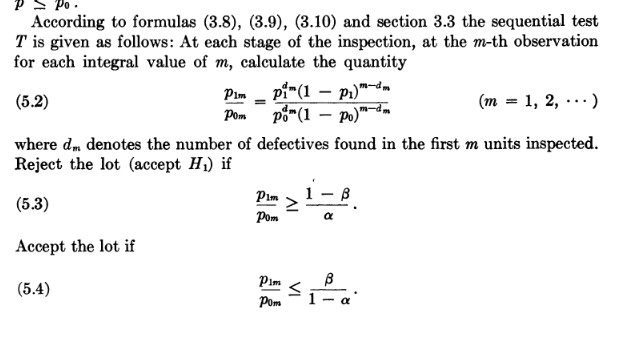

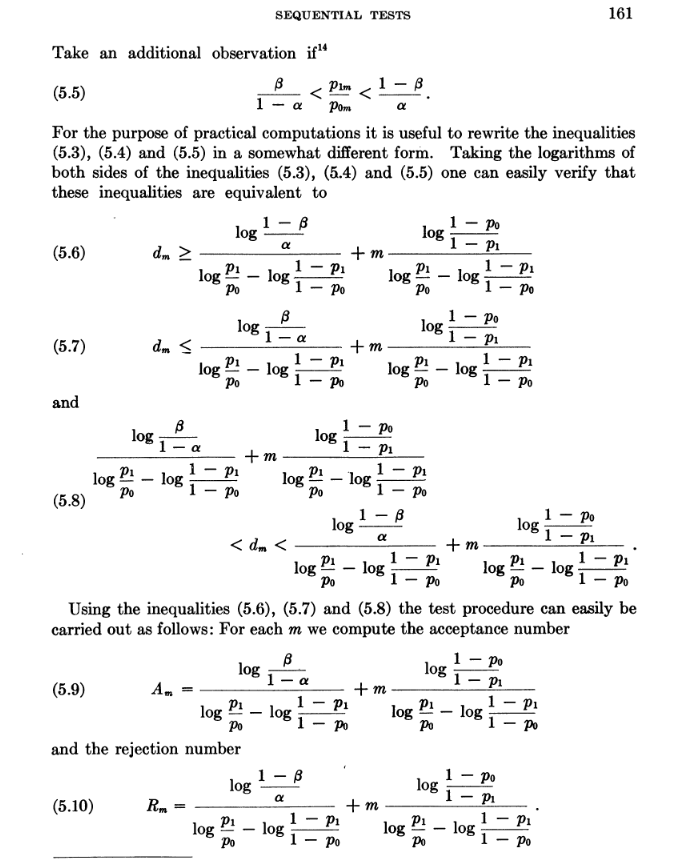

In [24]:
non_defective_df

,m,result
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
495,496,0
496,497,0
497,498,0
498,499,0


In [25]:
# d_m is number of defectives found in the first m units inspected 
non_defective_df['d_m'] = non_defective_df['result'].cumsum()

In [ ]:
# Let's assume \alpha = 0.05 (5% significance) and \beta = 0.2 ( 80% statistical power)

alpha = 0.05
beta = 0.2

In [39]:
# Equation 5.9

def calculate_acceptance_number(alpha, beta, p0, p1, m):
  return ((np.log(beta / (1 - alpha)) / 
           (np.log(p1 / p0) - np.log((1 - p1) / (1 - p0)))) + 
          (m * (np.log((1 - p0) / (1 - p1)) / 
                (np.log(p1 / p0) - np.log((1 - p1) / (1 - p0))))))

In [40]:
# Equation 5.10

def calculate_rejection_number(alpha, beta, p0, p1, m):
  return ((np.log((1 - beta) / alpha)) / 
          (np.log(p1 / p0) - np.log((1 - p1) / (1 - p0))) + 
          (m * (np.log((1 - p0) / (1 - p1)) / 
                (np.log(p1 / p0) - np.log((1 - p1) / (1 - p0))))))

In [42]:
non_defective_df['A_m'] = non_defective_df['m'].apply(lambda x: calculate_acceptance_number(alpha, beta, p0, p1, x))

In [43]:
non_defective_df['R_m'] = non_defective_df['m'].apply(lambda x: calculate_rejection_number(alpha, beta, p0, p1, x))

In [44]:
non_defective_df

,m,result,d_m,A_m,R_m
0,1,0,0,-1.374179,2.495929
1,2,0,0,-1.355941,2.514167
2,3,0,0,-1.337703,2.532405
3,4,0,0,-1.319465,2.550644
4,5,0,0,-1.301227,2.568882
...,...,...,...,...,...
495,496,0,5,7.653703,11.523812
496,497,0,5,7.671941,11.542050
497,498,0,5,7.690179,11.560288
498,499,0,5,7.708418,11.578526


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


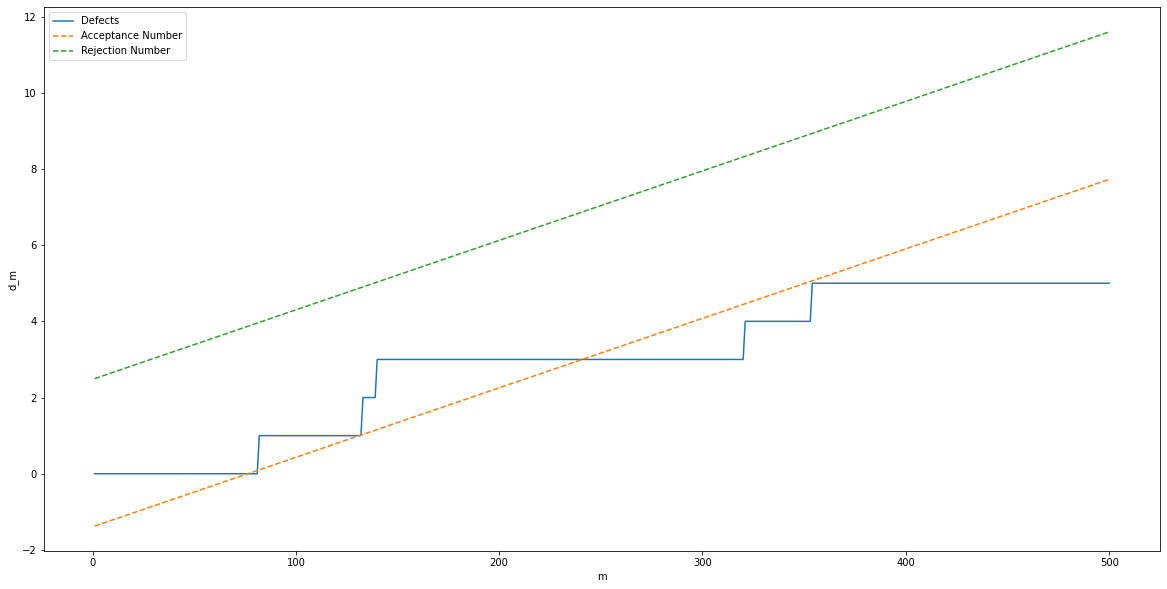

In [45]:
plt.figure(figsize=(20,10))
sns.lineplot(non_defective_df['m'], non_defective_df['d_m'], label='Defects')
sns.lineplot(non_defective_df['m'], non_defective_df['A_m'], label='Acceptance Number', linestyle='--')
sns.lineplot(non_defective_df['m'], non_defective_df['R_m'], label='Rejection Number', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# Correctly indicates to accept null hypothesis 
# Let's now look at a defective example

In [46]:
p = 0.1
defective_results = []

for m in range(500):
  defective_results.append([m + 1, make_widget(p)])

defective_df = pd.DataFrame(defective_results, columns = ['m', 'result'])
defective_df['result'].value_counts()

0    449
1     51
Name: result, dtype: int64

In [47]:
# Compute cumulative defects vs acceptance and rejection bounds as before

defective_df['d_m'] = defective_df['result'].cumsum()
defective_df['A_m'] = defective_df['m'].apply(lambda x: calculate_acceptance_number(alpha, beta, p0, p1, x))
defective_df['R_m'] = defective_df['m'].apply(lambda x: calculate_rejection_number(alpha, beta, p0, p1, x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


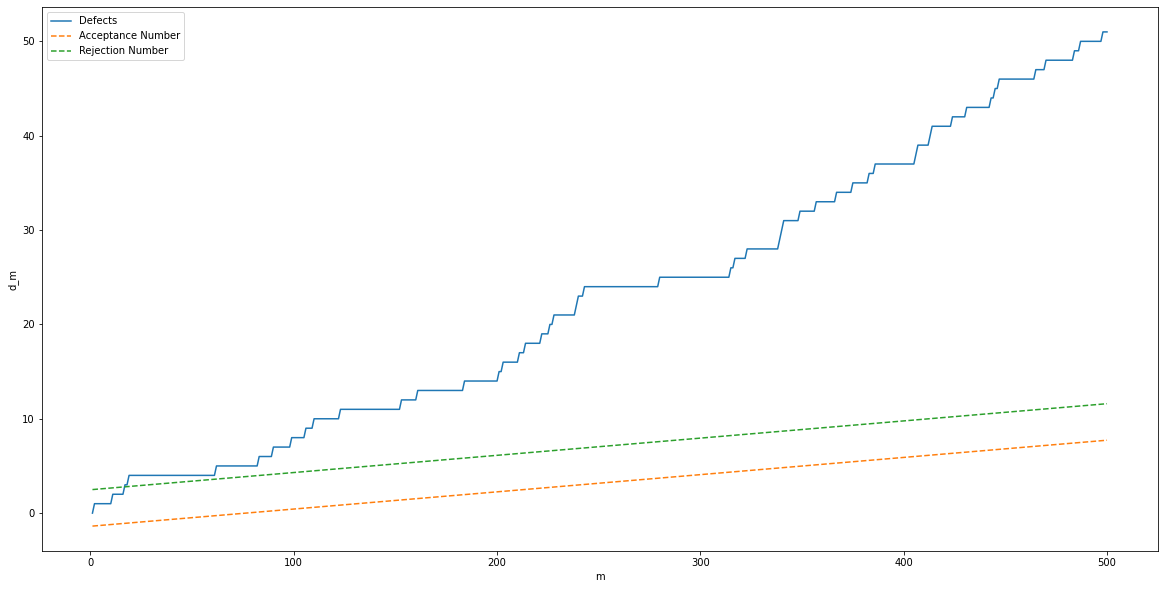

In [48]:
plt.figure(figsize=(20,10))
sns.lineplot(defective_df['m'], defective_df['d_m'], label='Defects')
sns.lineplot(defective_df['m'], defective_df['A_m'], label='Acceptance Number', linestyle='--')
sns.lineplot(defective_df['m'], defective_df['R_m'], label='Rejection Number', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# Correctly indicates to reject null hypothesis 

In [51]:
def compute_lp(alpha, beta, h):
  return ((((1 - beta) / alpha) ** h) - 1) / ((((1 - beta) / alpha) ** h) - (beta / (1 - alpha)) ** h)

def compute_p(p1, p0, h):
  return((1 - ((1 - p1) / (1 - p0)) ** h) / (((p1 / p0) ** h) - ((1 - p1) / (1 - p0)) ** h))
  

In [71]:
oc_curve = []

for h in np.arange(-10000, 10000, 1):
  if h != 0:
    oc_curve.append([h, compute_lp(alpha, beta, h), compute_p(p1, p0, h)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """


In [72]:
oc_df = pd.DataFrame(oc_curve, columns = ['h', 'lp', 'p'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


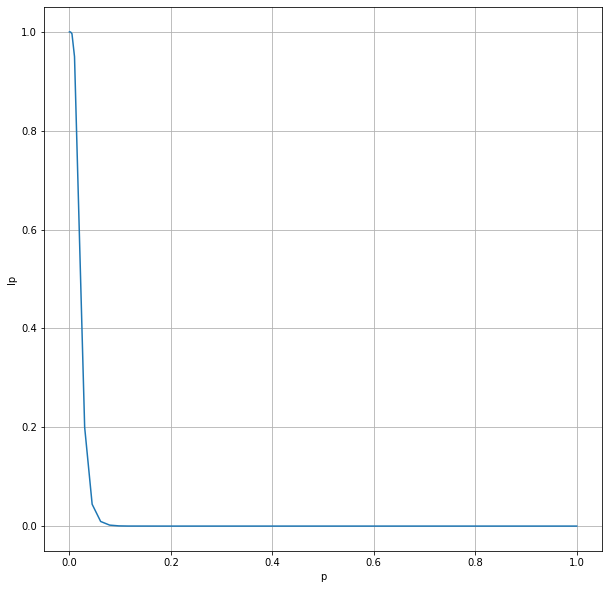

In [82]:
plt.figure(figsize=(10, 10))
sns.lineplot(oc_df['p'], oc_df['lp'])

#plt.axvline(p0, linestyle='--')
#plt.axhline(1 - alpha, linestyle='--')

#plt.axvline(p1, linestyle='--')
#plt.axhline(beta, linestyle='--')

plt.grid()

In [83]:
# Now we wish to explore how varying p0 and p1 changes the analysis. Specifically, does changing these values change the number of 
#   observations needed to accept/reject, and/or the accuracy of the test? 

In [97]:
p0_range = np.arange(0.01, 0.03, 0.005)

In [98]:
p0_range

array([0.01 , 0.015, 0.02 , 0.025])

In [99]:
for p0 in p0_range:
  non_defective_df['A_m_p0_' + str(p0)] = non_defective_df['m'].apply(lambda x: calculate_acceptance_number(alpha, beta, p0, p1, x))
  non_defective_df['R_m_p0_' + str(p0)] = non_defective_df['m'].apply(lambda x: calculate_rejection_number(alpha, beta, p0, p1, x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

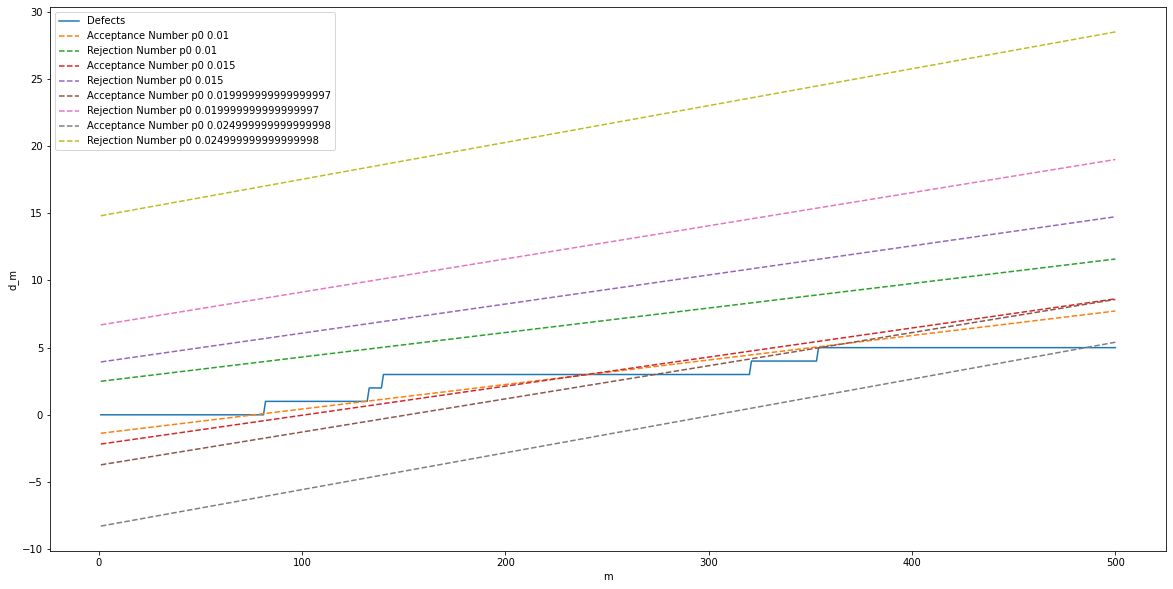

In [100]:
plt.figure(figsize=(20,10))
sns.lineplot(non_defective_df['m'], non_defective_df['d_m'], label='Defects')

for p0 in p0_range:
  sns.lineplot(non_defective_df['m'], non_defective_df['A_m_p0_' + str(p0)], label='Acceptance Number p0 ' + str(p0), linestyle='--')
  sns.lineplot(non_defective_df['m'], non_defective_df['R_m_p0_' + str(p0)], label='Rejection Number p0 ' + str(p0), linestyle='--')
plt.show()